## 통신사 해지 고객 예측
- CustomerId : customer id
- Gender : Gender
- SeniorCitizen : Whether the customer is old (1, 0)
- Partner : Whether the customer has a partner (Yes, No)
- Dependents : Whether the customer has dependents (Yes, No)
- tenure : 고객이 회사에 머무른 월 수
- PhoneService : Whether the customer has telephone service (Yes, No)
- MultipleLines : Whether the customer has more than one line (Yes, No, No phone service)
- InternetService : Customer's internet service provider (DSL, Fiber optic, No)
- OnlineSecurity : Whether the customer has online security (Yes, No, no Internet service)
- OnlineBackup : Whether the customer has an online backup (Yes, No, no Internet service)
- DeviceProtection : Whether the customer has device protection (Yes, No, no Internet service)
- TechSupport : Whether the customer has technical support (Yes, No, no Internet service)
- StreamingTV : Whether the customer has TV broadcast (Yes, No, no Internet service)
- StreamingMovies : Whether the client is streaming movies (Yes, No, no Internet service)
- Contract : 고객의 계약기간(월별, 1년, 2년)
- PaperlessBilling : Whether the customer has a paperless invoice (Yes, No)
- PaymentMethod : Customer's payment method (Electronic check, Postal check, Bank transfer (automatic), Credit card (automatic))
- MonthlyCharges : The monthly amount charged to the customer
- TotalCharges : Total amount charged from customer
- Churn : Whether the customer is using (Yes or No)

In [219]:
import seaborn as sns

In [220]:
import matplotlib.pyplot as plt

In [221]:
import pandas as pd
import numpy as np

In [222]:
df = pd.read_csv('/Users/hayeon/Downloads/WA_Fn-UseC_-Telco-Customer-Churn.csv.xls')

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [98]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###  TotalCharges 타입을 object -> float으로 변환

In [226]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [57]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [59]:
df[df.TotalCharges.isnull()==True].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

- to_numeric 하기 전 값 -> 아예 빈칸으로 되어있음

In [225]:
df[df.index==488]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No


In [227]:
df.drop(df[df.TotalCharges.isnull()==True].index, axis=0, inplace=True)

    - tenure(기간)이 0이기 때문에 TotalCharge가 Nan으로 저장되어있는 것 같다. 
    - > 기간이 0인 레코드가 11개 뿐이기 때문에 drop

In [63]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [65]:
from sklearn.preprocessing import LabelEncoder

- object 타입 변수 모두 라벨인코딩

In [228]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
        return dataframe_series

In [229]:
df2 = df.apply(lambda x: object_to_int(x))

In [230]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7032 non-null   int64 
 1   gender            7032 non-null   int64 
 2   SeniorCitizen     0 non-null      object
 3   Partner           7032 non-null   int64 
 4   Dependents        7032 non-null   int64 
 5   tenure            0 non-null      object
 6   PhoneService      7032 non-null   int64 
 7   MultipleLines     7032 non-null   int64 
 8   InternetService   7032 non-null   int64 
 9   OnlineSecurity    7032 non-null   int64 
 10  OnlineBackup      7032 non-null   int64 
 11  DeviceProtection  7032 non-null   int64 
 12  TechSupport       7032 non-null   int64 
 13  StreamingTV       7032 non-null   int64 
 14  StreamingMovies   7032 non-null   int64 
 15  Contract          7032 non-null   int64 
 16  PaperlessBilling  7032 non-null   int64 
 17  PaymentMethod 

- 원래 데이터가 숫자였던 컬럼들은 None 처리됨. 그래서 int, float였던 컬럼들 타입이 모두 object로 변환되어버림-> 다시 채워넣어야 함

In [231]:
df2

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,None,1,0,None,0,1,0,0,...,0,0,0,0,0,1,2,None,None,0
1,3953,1,None,0,0,None,1,0,0,2,...,2,0,0,0,1,0,3,None,None,0
2,2558,1,None,0,0,None,1,0,0,2,...,0,0,0,0,0,1,3,None,None,1
3,5524,1,None,0,0,None,0,1,0,2,...,2,2,0,0,1,0,0,None,None,0
4,6500,0,None,0,0,None,1,0,1,0,...,0,0,0,0,0,1,2,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,4843,1,None,1,1,None,1,2,0,2,...,2,2,2,2,1,1,3,None,None,0
7039,1524,0,None,1,1,None,1,2,1,0,...,2,0,2,2,1,1,1,None,None,0
7040,3358,0,None,1,1,None,0,1,0,2,...,0,0,0,0,0,1,2,None,None,0
7041,5923,1,None,1,0,None,1,2,1,0,...,0,0,0,0,0,1,3,None,None,1


In [232]:
df2['SeniorCitizen'] = df['SeniorCitizen']

In [233]:
df2['tenure'] = df['tenure']

In [234]:
df2['MonthlyCharges'] = df['MonthlyCharges']

In [235]:
df2['TotalCharges'] = df['TotalCharges']

In [237]:
df2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1


In [75]:
df2.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<BarContainer object of 2 artists>

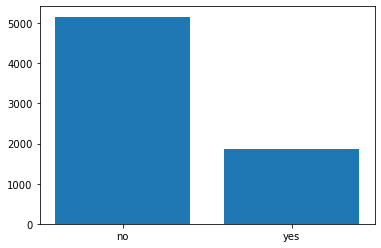

In [101]:
plt.bar(['no','yes'], df2['Churn'].value_counts())

- smote가 필요할까 했는데 고차원 데이터에선 단점이 될 수 있다고 하여 보류

In [240]:
import pandas as pd
import numpy as np
import missingno as msno

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

In [241]:
fig = px.histogram(df2, x = 'Churn', color = 'gender', 
                  title='<b>Churn - gender </b>')
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- 비율로 보면 이탈을 한 그룸 안한 그룹 모두 성별비율은 반반 즈음인 것 같다.

In [242]:
fig = px.histogram(df2, x = 'Churn', color = 'Dependents', 
                  title='<b>Churn - Dependents </b>')
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- Dependents가 없는 경우 이탈 가능성이 더 높다

In [243]:
fig = px.histogram(df2, x = 'Churn', color = 'PaperlessBilling', 
                  title='<b>Churn - PaperBilling </b>')
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- 종이 영수증을 쓸 사람일 수록 이탈 가능성이 높다

In [124]:
fig = px.histogram(df2, x = 'Churn', color = 'SeniorCitizen', 
                  title='<b>Churn - SeniorCitizen </b>')
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

- 이탈하지 않은 경우의 비율과 얼추 비슷하다. 때문에 senior가 아닐수록 이탈할 가능성이 높다고할 수 없을 것 같다

In [116]:
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

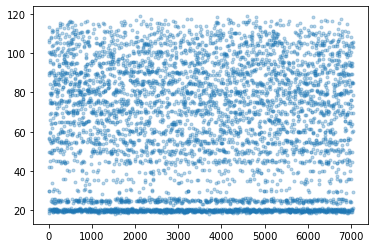

In [133]:
plt.plot(df2[df2['Churn']==0]['MonthlyCharges'], '.', alpha=0.3)

- 이탈하지 않은 고객들의 월별 요금은 낮은 가격에 분포하고 있다

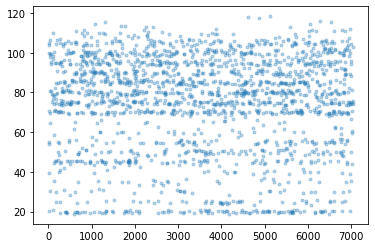

In [134]:
plt.plot(df2[df2['Churn']==1]['MonthlyCharges'], '.', alpha=0.3)

- 이탈한 고객들의 월별 요금은 상대적으로 높은 가격에 분포하고 있다

### label에 대한 변수 상관계수

In [136]:
plt.figure(figsize=(14,7))
df2.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.192858
PaperlessBilling    0.191454
SeniorCitizen       0.150541
PaymentMethod       0.107852
MultipleLines       0.038043
PhoneService        0.011691
gender             -0.008545
customerID         -0.017858
StreamingTV        -0.036303
StreamingMovies    -0.038802
InternetService    -0.047097
Partner            -0.149982
Dependents         -0.163128
DeviceProtection   -0.177883
OnlineBackup       -0.195290
TotalCharges       -0.199484
TechSupport        -0.282232
OnlineSecurity     -0.289050
tenure             -0.354049
Contract           -0.396150
Name: Churn, dtype: float64

<Figure size 1008x504 with 0 Axes>

In [248]:
df2[df2['Churn']==0]['tenure']

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64

### 상관계수 히트맵

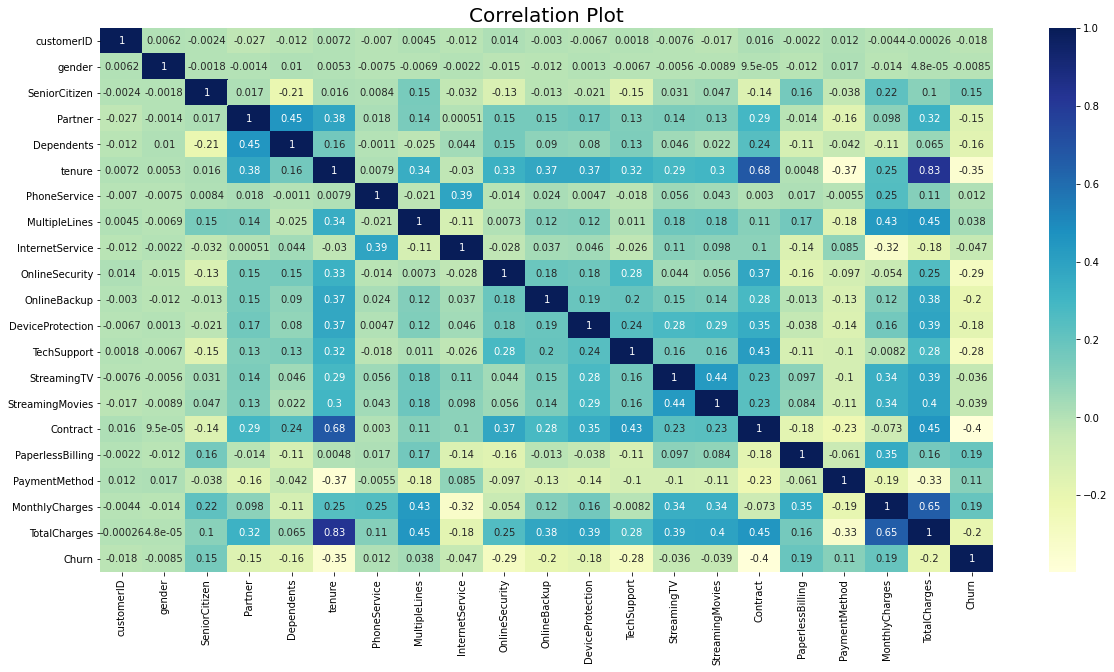

In [96]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Plot', fontsize=20)
plt.show()

- 특출나게 높은 것도, 낮은 것도 없다. 딱 하나의 feature를 선정하기 힘들다

In [265]:
df2.drop('customerID', axis=1, inplace=True)

---
---
# ⭐️ 모델링

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
#from sklearn.tree import DecisionTreeClassifier : RF 보다 당연히 성능저하
from sklearn.linear_model import LogisticRegression

In [266]:
X = df2.drop(['Churn'], axis=1)
y = df2[['Churn']]

In [268]:
from sklearn.metrics import accuracy_score, roc_curve, classification_report, confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score

- 성능좋은 random_state가 뭘까......

70 : 0.7957906712172924
71 : 0.7889647326507395
72 : 0.7923777019340159
73 : 0.7849829351535836
74 : 0.8083048919226393
75 : 0.7872582480091013
76 : 0.8003412969283277
77 : 0.7986348122866894
78 : 0.7844141069397043
79 : 0.7923777019340159
80 : 0.7918088737201365
81 : 0.7838452787258248
82 : 0.8048919226393629
83 : 0.7844141069397043
84 : 0.7787258248009101
85 : 0.782707622298066
86 : 0.7923777019340159
87 : 0.7775881683731513
88 : 0.7997724687144482
89 : 0.7866894197952219
90 : 0.8003412969283277
91 : 0.8037542662116041
92 : 0.7929465301478953
93 : 0.782707622298066
94 : 0.7957906712172924
95 : 0.79806598407281
96 : 0.8020477815699659
97 : 0.7901023890784983
98 : 0.7997724687144482
99 : 0.8043230944254836


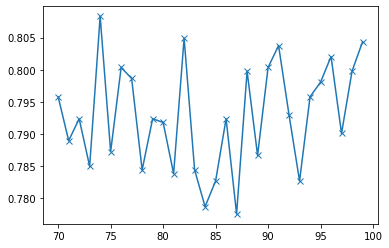

In [340]:
a = []
for i in range(70, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i)
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    a.append(ac)
    print(i, ':', ac)
plt.plot(range(70, 100), a, 'x-')

In [520]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

> # Voting

- Rf, lr, abc, svc, xg, gb

In [522]:
rf = RandomForestClassifier(random_state=85)
lr = LogisticRegression(random_state=85)
abc = AdaBoostClassifier(random_state=85)
svc = SVC()
xg = XGBClassifier(random_state=85)
gb = GradientBoostingClassifier(random_state=85)

In [523]:
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)
abc.fit(X_train, y_train)
svc.fit(X_train, y_train)
xg.fit(X_train, y_train)
gb.fit(X_train, y_train)

[15:19:41] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GradientBoostingClassifier(random_state=85)

In [524]:
y_pred_rf = rf.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_abc = abc.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_xg = xg.predict(X_test)
y_pred_gb = gb.predict(X_test)

In [525]:
ac_rf = accuracy_score(y_test, y_pred_rf)
ac_lr = accuracy_score(y_test, y_pred_lr)
ac_abc = accuracy_score(y_test, y_pred_abc)
ac_svc = accuracy_score(y_test, y_pred_svc)
ac_xg = accuracy_score(y_test, y_pred_xg)
ac_gb = accuracy_score(y_test, y_pred_gb)

In [526]:
print('rf', ac_rf)
print('lr', ac_lr)
print('abc', ac_abc)
print('svc', ac_svc)
print('xg', ac_xg)
print('gb', ac_gb)

rf 0.8065984072810012
lr 0.8213879408418657
abc 0.8225255972696246
svc 0.7445961319681457
xg 0.8088737201365188
gb 0.8134243458475541


## Feature importance (변수 중요도) 저장

In [548]:
rf_fi = pd.DataFrame(rf.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

In [551]:
abc_fi = pd.DataFrame(abc.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)

In [554]:
xg_fi = pd.DataFrame(xg.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)


In [558]:
gb_fi = pd.DataFrame(gb.feature_importances_, index=X.columns, columns=['importance']).sort_values('importance', ascending=False)


## ⭐️ LR + ABC + GB

In [533]:
clf1 = LogisticRegression(random_state=85)
clf2 = AdaBoostClassifier(random_state=85)
clf3 = GradientBoostingClassifier(random_state=85)

eclf1 = VotingClassifier(estimators=[('LR', clf1), ('ABC', clf2),
                                    ('GB', clf3)], voting='soft',
                        n_jobs=-1)
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print('Final Accuracy score: ', accuracy_score(y_test, predictions))

Final Accuracy score:  0.8225255972696246


In [535]:
prec = precision_score(y_test, predictions)
rec = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
ac = accuracy_score(y_test, predictions)

print('< LR+ABC+GB >')
print('accuracy :', ac)
print('precision :', prec)
print('recall :', rec)
print('f1 :', f1)

print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

< LR+ABC+GB >
accuracy : 0.8225255972696246
precision : 0.6951566951566952
recall : 0.5434298440979956
f1 : 0.61
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      1309
           1       0.70      0.54      0.61       449

    accuracy                           0.82      1758
   macro avg       0.77      0.73      0.75      1758
weighted avg       0.81      0.82      0.81      1758

[[1202  107]
 [ 205  244]]


In [537]:
from sklearn.metrics import auc

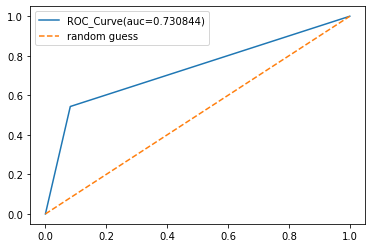

In [539]:
tpr, fpr, thershold = roc_curve(y_test, predictions)
auc_s = auc(tpr, fpr)

plt.plot(tpr, fpr, label='ROC_Curve(auc=%f)'%auc_s)
plt.plot([0,1], [0,1], '--', label='random guess')
plt.legend()

In [382]:
from sklearn.ensemble import VotingClassifier
clf1 = RandomForestClassifier(random_state=85)
clf2 = LogisticRegression(random_state=85)
clf3 = AdaBoostClassifier(random_state=85)

eclf1 = VotingClassifier(estimators=[('RF', clf1), ('lr', clf2),
                                    ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print('Final Accuracy score: ', accuracy_score(y_test, predictions))

Final Accuracy score:  0.8174061433447098


In [384]:
clf1 = RandomForestClassifier(random_state=85)
clf2 = SVC(random_state=85, probability=True)
clf3 = KNeighborsClassifier()

eclf1 = VotingClassifier(estimators=[('RF', clf1), ('svc', clf2),
                                    ('KN', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print('Final Accuracy score: ', accuracy_score(y_test, predictions))

Final Accuracy score:  0.8065984072810012


In [385]:
clf1 = RandomForestClassifier(random_state=85)
clf2 = LogisticRegression(random_state=85)
clf3 = AdaBoostClassifier(random_state=85)

eclf1 = VotingClassifier(estimators=[('RF', clf1), ('LR', clf2),
                                    ('ABC', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print('Final Accuracy score: ', accuracy_score(y_test, predictions))

Final Accuracy score:  0.8174061433447098


In [158]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from xgboost import XGBClassifier
from sklearn.model_selection import KFold

# 데이터 선정

In [564]:
rf_fi.head()

,importance
TotalCharges,0.190709
MonthlyCharges,0.177278
tenure,0.158140
Contract,0.076041
PaymentMethod,0.051780


In [562]:
abc_fi.head()

,importance
TotalCharges,0.26
MonthlyCharges,0.20
tenure,0.16
Contract,0.14
PaymentMethod,0.04


In [565]:
xg_fi.head()

,importance
Contract,0.442451
InternetService,0.080631
OnlineSecurity,0.062929
TechSupport,0.053029
StreamingMovies,0.035196


In [566]:
gb_fi.head()

,importance
Contract,0.413562
tenure,0.136270
MonthlyCharges,0.135430
TotalCharges,0.089310
TechSupport,0.067092


In [570]:
abc_fi.head().index.values

array(['TotalCharges', 'MonthlyCharges', 'tenure', 'Contract',
       'PaymentMethod'], dtype=object)

In [573]:
abc_X = X[abc_fi.head().index.values]

In [574]:
X_train, X_test, y_train, y_test = train_test_split(abc_X, y, random_state=99)

In [582]:
#dt2 = DecisionTreeClassifier(max_depth=4, random_state=85)
abc2 = AdaBoostClassifier(random_state=85)
abc2.fit(X_train, y_train)
y_pred = abc2.predict(X_test)

print(classification_report(y_test, y_pred))
print('ac', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1309
           1       0.68      0.51      0.58       449

    accuracy                           0.81      1758
   macro avg       0.76      0.71      0.73      1758
weighted avg       0.80      0.81      0.80      1758

ac 0.8122866894197952


In [576]:
rf2 = RandomForestClassifier(random_state=85)
rf2.fit(X_train, y_train)
y_pred =rf2.predict(X_test)

print(classification_report(y_test, y_pred))
print('ac', accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1309
           1       0.60      0.50      0.55       449

    accuracy                           0.79      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.78      0.79      0.78      1758

ac 0.7878270762229806


> # 정리 
    - data split : 99, model : 85 고정
    - Voting에 쓰일 모델 : LR, ABC, GB (개별 정확도 기준)
    - GridSearchCV 활용해서 하나씩 최적화하여 Voting
    - 변수 골라서 조정해가면서 단순화해보려고 함
    -> 오리지널 변수 Voting / 변수 선정 Voting (10컬럼 / 5컬럼) ... 
    
    - 평가기준 : AUC (fpr, tpr 종합 판단, 전반적 모델성능) > precision, recall
        우리 모델 목표 : 고객 이탈이라고 했는데 안나가는 경우 vs 고객 이탈 안한다고 했는데 나간 경우 
            => 이탈 안한다고 예측했는데 나간 경우가 더 타격이 클 것 -> FN이 낮아야 한다. -> recall 높은게 더 좋은 모델 
   cf. accuracy : label 비율이 불균형일 때 객관성 떨어짐 
    
    - 느낀점 
        활용할 수 있는 모델의 종류가 정말 다양하고, 변수를 많이 제거해도 정확도가 생각보다 많이 낮아지지 않아서 놀랐다
        최적화하는 과정도 오래 걸리지 않아서 여러 모델을 만들고 비교해볼 수 있을 것 같다!

---
---

    - precision 높아 = fP 적어 = 이탈할거라고 예측했는데 안한 경우가 적어
    - recall 낮아 = Fn 많아 = 이탈 안할거라고 했는데 이탈한 경우가 많아 

# GridSearchCV

In [352]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=99)

In [353]:
RFC = RandomForestClassifier(max_depth=3, max_features=8, min_samples_split=8, min_samples_leaf=3,
                            n_estimators=50)

rf_param_grid = {}
#                'min_samples_leaf':[1,3,8],
#                'bootstrap':[None],
#                'n_estimators':[100, 300],
#                'criterion':['gini']}

gs_RFC = GridSearchCV(RFC, rf_param_grid, cv=k_fold, scoring='accuracy', verbose=1)

gs_RFC.fit(X_train, y_train)

RFC_best = gs_RFC.best_estimator_
gs_RFC.best_score_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


0.7830853602438043

In [297]:
RFC_best

RandomForestClassifier(max_depth=3, max_features=8, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=50)

In [300]:
from sklearn.tree import DecisionTreeClassifier

# 교차검증

In [306]:
from sklearn.model_selection import cross_val_score, cross_validate

In [507]:
gb_clf = GradientBoostingClassifier(random_state=85)
scores = cross_val_score(rf_clf, X, y, scoring='accuracy', cv=10)
print('GB 교차 검증 별 정확도 : {}'.format(scores))

GB 교차 검증 별 정확도 : [0.80113636 0.80539773 0.78378378 0.80085349 0.78662873 0.76386913
 0.81507824 0.78805121 0.79658606 0.80512091]


In [380]:
abc_clf = AdaBoostClassifier(random_state=85)
scores = cross_val_score(abc_clf, X, y, scoring='accuracy', cv=10)
print('ABC 교차 검증 별 정확도 : {}'.format(scores))

ABC 교차 검증 별 정확도 : [0.80823864 0.81107955 0.79089616 0.81081081 0.78805121 0.79374111
 0.83072546 0.77524893 0.78947368 0.81650071]


In [381]:
lr_clf = LogisticRegression(random_state=85)
scores = cross_val_score(lr_clf, X, y, scoring='accuracy', cv=10)
print('RF 교차 검증 별 정확도 : {}'.format(scores))

RF 교차 검증 별 정확도 : [0.79261364 0.79971591 0.78805121 0.81081081 0.79658606 0.78520626
 0.81223329 0.79943101 0.78947368 0.81507824]


In [165]:
import matplotlib.pyplot as plt

# RFC 최적화

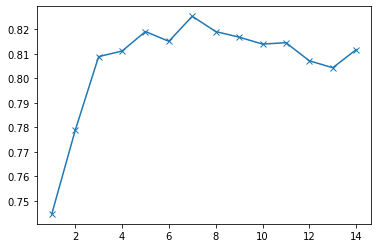

In [386]:
a = []
for i in range(1, 15):
    rf = RandomForestClassifier(max_depth=i, random_state=85)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    a.append(ac)
plt.plot(list(range(1,15)), a, 'x-')

### split의 random_state 85일 때 최적 max_depth 는 7

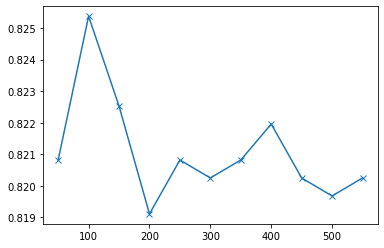

In [387]:
a = []
for i in range(50, 600, 50):
    rf = RandomForestClassifier(max_depth=7, n_estimators=i, random_state=85)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    a.append(ac)
plt.plot(list(range(50,600, 50)), a, 'x-')

### 최적 n_estimators는 100

In [388]:
RFC = RandomForestClassifier(max_depth=7, n_estimators=100, random_state=85)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.8253697383390216


- RFC 최적으로 끌어올리면 82%

# LR 최적화

In [400]:
lr_clf = LogisticRegression(random_state=85)

params={'penalty':['l2', 'l1', 'None'],
        'C':[0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56]}

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy', cv=10 )
grid_clf.fit(X, y)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, 
                                                  grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 0.52, 'penalty': 'l2'}, 최적 평균 정확도:0.802


# AdaBoost 최적화

1 : 0.7445961319681457
2 : 0.7616609783845278
3 : 0.7929465301478953
4 : 0.8031854379977247
5 : 0.8031854379977247
6 : 0.7969283276450512
7 : 0.7974971558589306
8 : 0.7878270762229806
9 : 0.7832764505119454
10 : 0.7906712172923777
11 : 0.7736063708759955
12 : 0.7690557451649602
13 : 0.7667804323094426
14 : 0.7565415244596132
15 : 0.7605233219567691


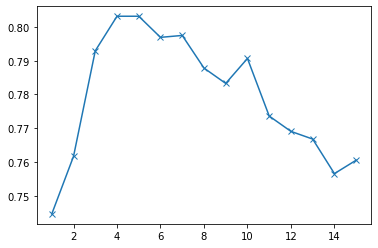

In [404]:
a = []
for i in range(1, 16):
    dt = DecisionTreeClassifier(max_depth=i, random_state=85)
    dt.fit(X_train, y_train)
    y_pred = dt.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    a.append(ac)
    print(i, ':', ac)
plt.plot(range(1, 16), a, 'x-')

### base model로 쓸 Dt 최적화는 max_depth만 조절

In [411]:
base_model_dt = DecisionTreeClassifier(max_depth=4, random_state=85)

## ABC 최적값 찾기

5 : 0.8100113765642776
25 : 0.7992036405005688
45 : 0.7832764505119454
65 : 0.7741751990898749
85 : 0.7662116040955631
105 : 0.7605233219567691
125 : 0.7599544937428896
145 : 0.7622298065984073
165 : 0.7616609783845278
185 : 0.7559726962457338


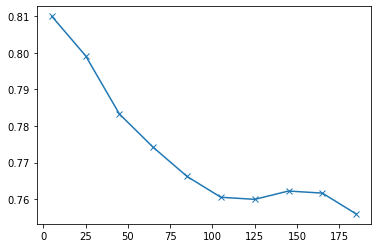

In [415]:
a = []
for i in range(5, 200, 20):
    ada_model = AdaBoostClassifier(base_estimator=base_model_dt, n_estimators=i, random_state=85)
    ada_model.fit(X_train, y_train)
    y_pred = ada_model.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    a.append(ac)
    print(i, ':', ac)
plt.plot(range(5, 200, 20), a, 'x-')

- n_estimators는 5가 최적인듯

0.58 : 0.8162684869169511
0.59 : 0.8151308304891922
0.6 : 0.823094425483504
0.61 : 0.823094425483504
0.62 : 0.8179749715585893
0.63 : 0.8213879408418657
0.64 : 0.8185437997724687
0.65 : 0.810580204778157


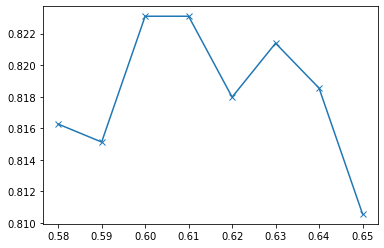

In [419]:
a = []
#l_rate = [0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

l_rate = [0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65]
for i in l_rate:
    ada_model = AdaBoostClassifier(base_estimator=base_model_dt, n_estimators=5, learning_rate=i, random_state=85)
    ada_model.fit(X_train, y_train)
    y_pred = ada_model.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    a.append(ac)
    print(i, ':', ac)
plt.plot(l_rate, a, 'x-')

- learning_rate 최적은 0.6

In [420]:
clf1 = RandomForestClassifier(max_depth=7, n_estimators=100, random_state=85)
clf2 = LogisticRegression(penalty='l2', C=0.52, random_state=85)
clf3 = AdaBoostClassifier(base_estimator=base_model_dt, n_estimators=5, learning_rate=0.6, random_state=85)

eclf1 = VotingClassifier(estimators=[('RF', clf1), ('lr', clf2),
                                    ('abc', clf3)], voting='soft')
eclf1.fit(X_train, y_train)
predictions = eclf1.predict(X_test)
print('Final Accuracy score: ', accuracy_score(y_test, predictions))

Final Accuracy score:  0.8225255972696246


# Feature engineering

In [441]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

## [고객 이탈과 관련된 직접적 변수만 채택](https://www.kaggle.com/sandraasagade/customer-churn-eda-and-prediction)

In [443]:
fe_df = df2.drop(['gender', 'SeniorCitizen', 'Partner', 'Dependents','tenure',
                  'MultipleLines', 'DeviceProtection','TechSupport','PaperlessBilling',
                  'OnlineSecurity','OnlineBackup'], axis=1)

In [473]:
fe_df.drop(['Churn'], axis=1, inplace=True)

In [509]:
X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(fe_df, y, random_state=99)

In [510]:
rf = RandomForestClassifier(random_state=85)
rf.fit(X_train_new, y_train_new)
y_pred = rf.predict(X_test_new)
print(accuracy_score(y_test_new, y_pred))

0.773037542662116


In [511]:
dt = DecisionTreeClassifier(random_state=85)
dt.fit(X_train_new, y_train_new)
y_pred = dt.predict(X_test_new)
print(accuracy_score(y_test_new, y_pred))

0.7377701934015927


In [484]:
knn = KNeighborsClassifier()
knn.fit(X_train_new, y_train_new)
y_pred = knn.predict(X_test_new)
print(accuracy_score(y_test_new, y_pred))

0.7781569965870307


In [485]:
svc = SVC()
svc.fit(X_train_new, y_train_new)
y_pred = svc.predict(X_test_new)
print(accuracy_score(y_test_new, y_pred))

0.7445961319681457


In [486]:
lr = LogisticRegression(random_state=85)
lr.fit(X_train_new, y_train_new)
y_pred = lr.predict(X_test_new)
print(accuracy_score(y_test_new, y_pred))

0.810580204778157


In [487]:
abc = AdaBoostClassifier(random_state=85)
abc.fit(X_train_new, y_train_new)
y_pred = abc.predict(X_test_new)
print(accuracy_score(y_test_new, y_pred))

0.8065984072810012


In [488]:
xg = XGBClassifier()
xg.fit(X_train_new, y_train_new)
y_pred = xg.predict(X_test_new)
print(accuracy_score(y_test_new, y_pred))

[01:45:20] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.7889647326507395


In [512]:
gb = GradientBoostingClassifier()
gb.fit(X_train_new, y_train_new)
y_pred = gb.predict(X_test_new)
print(accuracy_score(y_test_new, y_pred))

0.8083048919226393


In [513]:
clf1 = LogisticRegression(random_state=85)
clf2 = AdaBoostClassifier(random_state=85)
clf3 = GradientBoostingClassifier(random_state=85)

eclf1 = VotingClassifier(estimators=[('LR', clf1), ('ABC', clf2),
                                    ('GB', clf3)], voting='soft')
eclf1.fit(X_train_new, y_train_new)
predictions = eclf1.predict(X_test_new)
print('Final Accuracy score: ', accuracy_score(y_test, predictions))

Final Accuracy score:  0.8139931740614335


In [584]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes
